# Aim: Create a binary classification model to classify pateints into either negative/positive for monkey pox disease

In [269]:
# import libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [281]:
# import dataset

dataset = pd.read_excel(r'C:\Users\sai\DATA.xlsx')
dataset.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [282]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [283]:
dataset.describe().T

,count,unique,top,freq
Patient_ID,25000,25000,P9982,1
Systemic Illness,25000,4,Fever,6382
Rectal Pain,25000,2,False,12655
Sore Throat,25000,2,True,12554
Penile Oedema,25000,2,True,12612
Oral Lesions,25000,2,False,12514
Solitary Lesion,25000,2,True,12527
Swollen Tonsils,25000,2,True,12533
HIV Infection,25000,2,True,12584
Sexually Transmitted Infection,25000,2,False,12554


<AxesSubplot:>

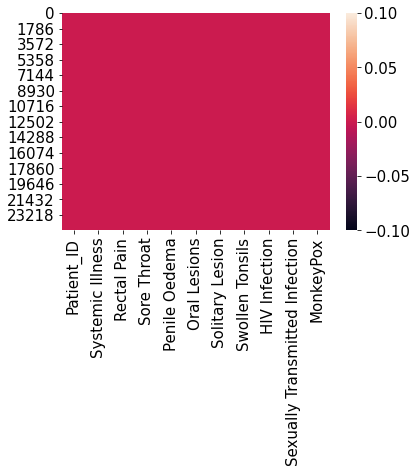

In [284]:
sns.heatmap(dataset.isnull())

#### Observations:

- Independent varaibles : There are 10 Independent varaibles in the given dataset, however the patientID is unique doen't contribute in disease predictions therefore we take all the sysmptoms(9) as independent variables.
- Response variable : The column 'MonkeyPox' is the response variable and it has 2 values : Positive and Negative
- Postive indicates the patient was diagnosed with MonkeyPox & Negative indicates that the patient doesnot have MonkeyPox.
- Therefore, this is a binary classification problem and the goal of the classifier is to identify whether the patient has MonkeyPox or not based on the symptoms(Independent variables) he/she presented with.
- The systemic Illness is of data type object and remaining independent variables are of type booean, the response variable is of datatype boolean.
- There are no numerical features.
- There are no missing values in the data.

# Exploratory Data Analysis (EDA)

The major goal of this EDA is to understand the given data 

This EDA is mainly focussed on following tasks :

- The number of people tested postive vs negative for the disease
- How each symptom is contributing in identifying the disease
- Visualizing the relationship between independent variables and response variable

In [285]:
dataset['MonkeyPox'].value_counts()

Positive    15909
Negative     9091
Name: MonkeyPox, dtype: int64

In [286]:
dataset['MonkeyPox'].value_counts(normalize=True)*100

Positive    63.636
Negative    36.364
Name: MonkeyPox, dtype: float64

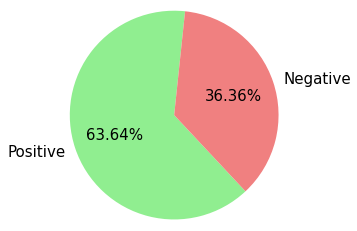

In [287]:
#plt.title("Percentage of people postive for Monkeypox vs Negative for Monkeypox")
plt.pie(dataset['MonkeyPox'].value_counts(),
        labels=['Positive','Negative'],
        colors=['lightgreen','lightcoral'],
        autopct='%1.2f%%',
        startangle=84,
        radius=1.2)

plt.axis("off")
plt.savefig('MonkeyPox_proportion.png')

<h3><span style='color:green'>
63.63% of the patients in the given datset are postive for monkey pox, where as 36.36% of the patients are negative for monkeypox. This is not a balanced dataset.</span></h3>

## Analysing all the sysmptoms associated with MonkeyPox in the given dataset

In [288]:
print(f"symptoms identified for MonkeyPox patients in the given data: \n\n {dataset.iloc[:,1:10].columns}")

symptoms identified for MonkeyPox patients in the given data: 

 Index(['Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema',
       'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Sexually Transmitted Infection'],
      dtype='object')


In [289]:
dataset['Systemic Illness'].unique()

array(['None', 'Fever', 'Swollen Lymph Nodes', 'Muscle Aches and Pain'],
      dtype=object)

In [290]:
print(f" In total there are {dataset.iloc[:,1:10].columns.nunique()+3} symptoms identified")

 In total there are 12 symptoms identified


In [291]:
dataset.iloc[:,1:10].columns

Index(['Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema',
       'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Sexually Transmitted Infection'],
      dtype='object')

## Count of patients suffered each symptoms

In [294]:
symptoms = dataset.iloc[:,1:10].columns
d = {}
for symptom in symptoms:
    d[symptom]=dataset[symptom].value_counts()
#print(d)       
df = pd.DataFrame(d)
df.fillna(' ',inplace=True)
df  


Index(['Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema',
       'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Sexually Transmitted Infection'],
      dtype='object')


,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
Fever,6382,,,,,,,,
Muscle Aches and Pain,6150,,,,,,,,
None,6216,,,,,,,,
Swollen Lymph Nodes,6252,,,,,,,,
False,,12655,12446,12388,12514,12473,12467,12416,12554
True,,12345,12554,12612,12486,12527,12533,12584,12446


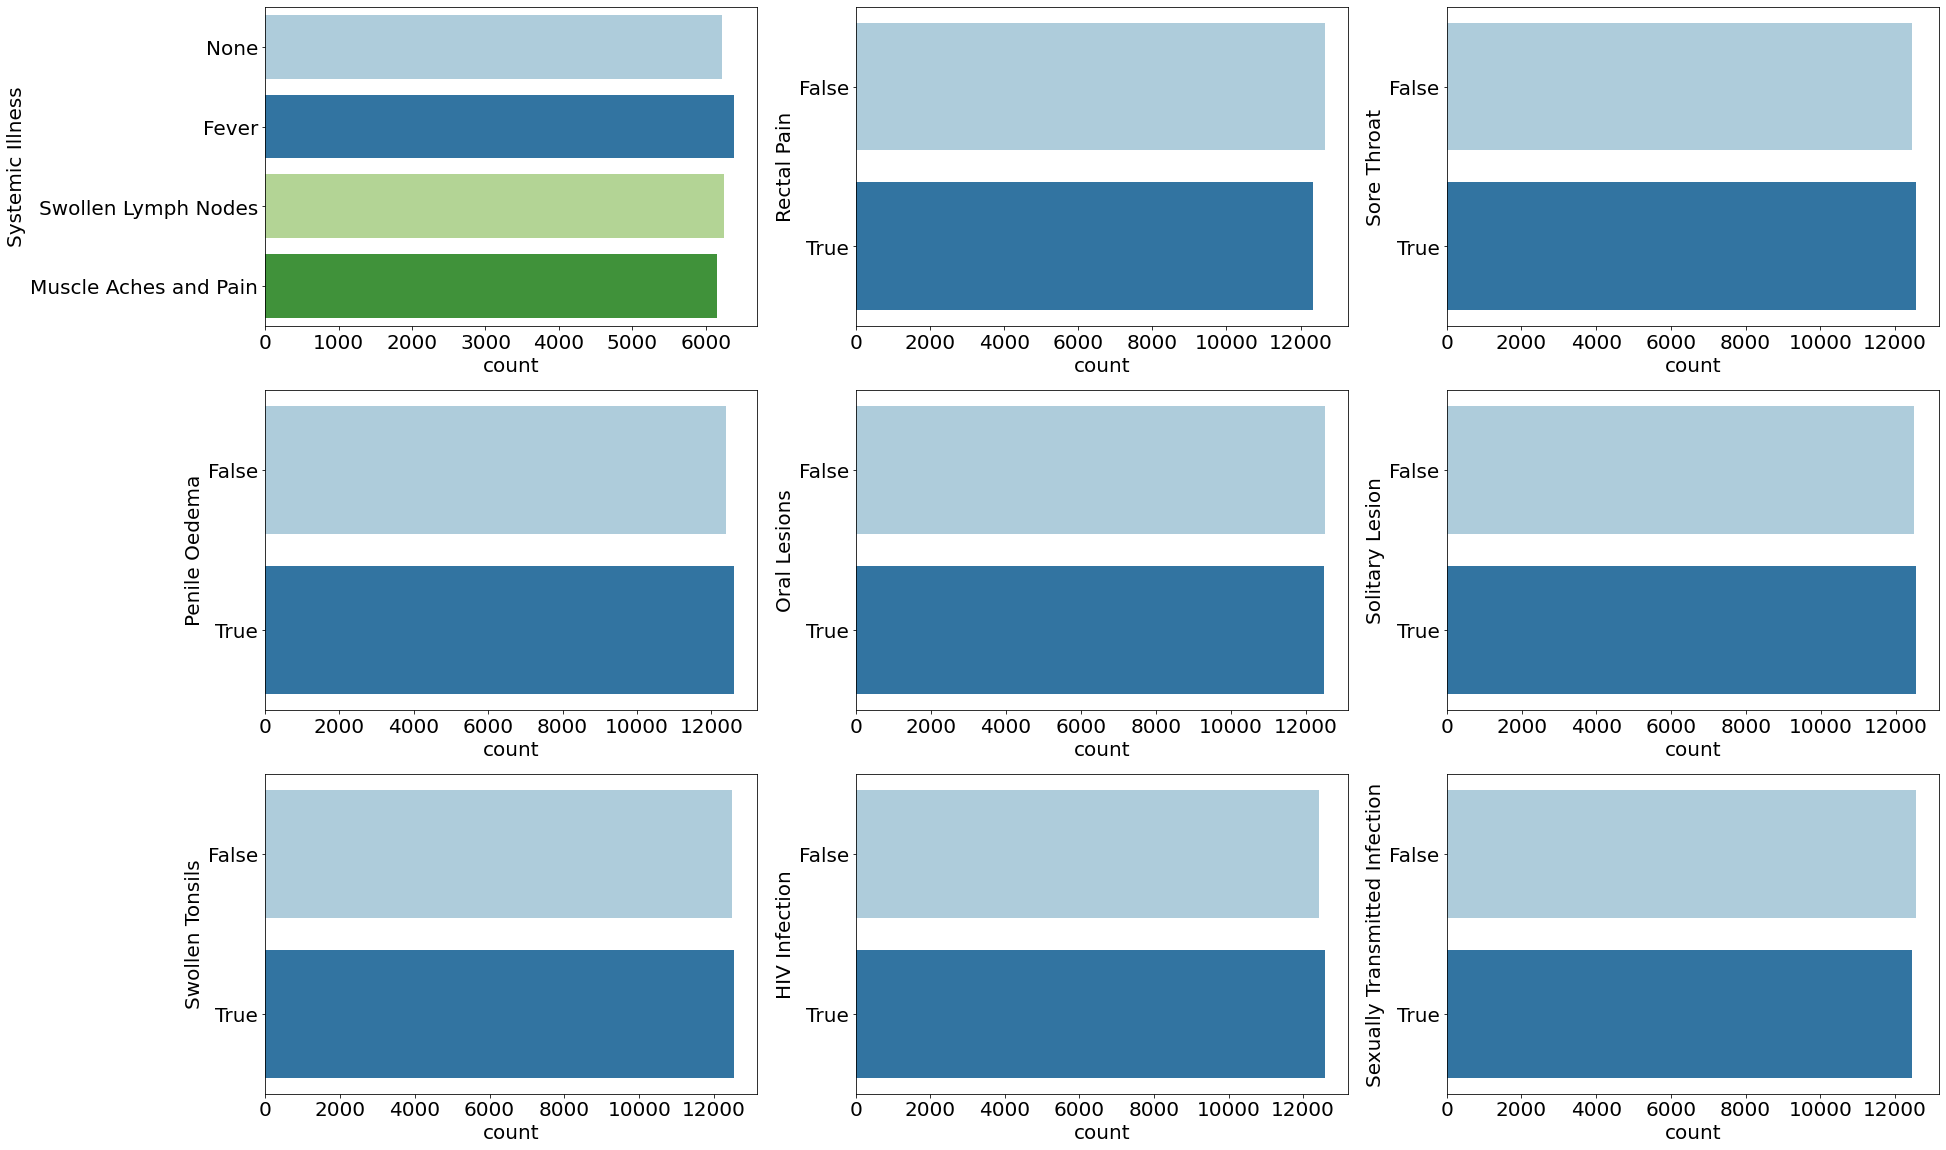

In [296]:
plt.figure(figsize=(30,20))
plt.rc('font', size=20)
for i in range(1,len(symptoms)+1):
    plt.subplot(3,3,i)
    sns.countplot(y=dataset[symptoms[i-1]],palette='Paired')
plt.savefig('symptoms.png')

In [12]:
symptoms = dataset.iloc[:,1:10].columns
d = {}
for symptom in symptoms:
    d[symptom]=dataset[symptom].value_counts(normalize=True)
        
df = pd.DataFrame(d)
df.fillna(' ',inplace=True)
df  


,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
Fever,0.25528,,,,,,,,
Muscle Aches and Pain,0.246,,,,,,,,
None,0.24864,,,,,,,,
Swollen Lymph Nodes,0.25008,,,,,,,,
False,,0.5062,0.49784,0.49552,0.50056,0.49892,0.49868,0.49664,0.50216
True,,0.4938,0.50216,0.50448,0.49944,0.50108,0.50132,0.50336,0.49784


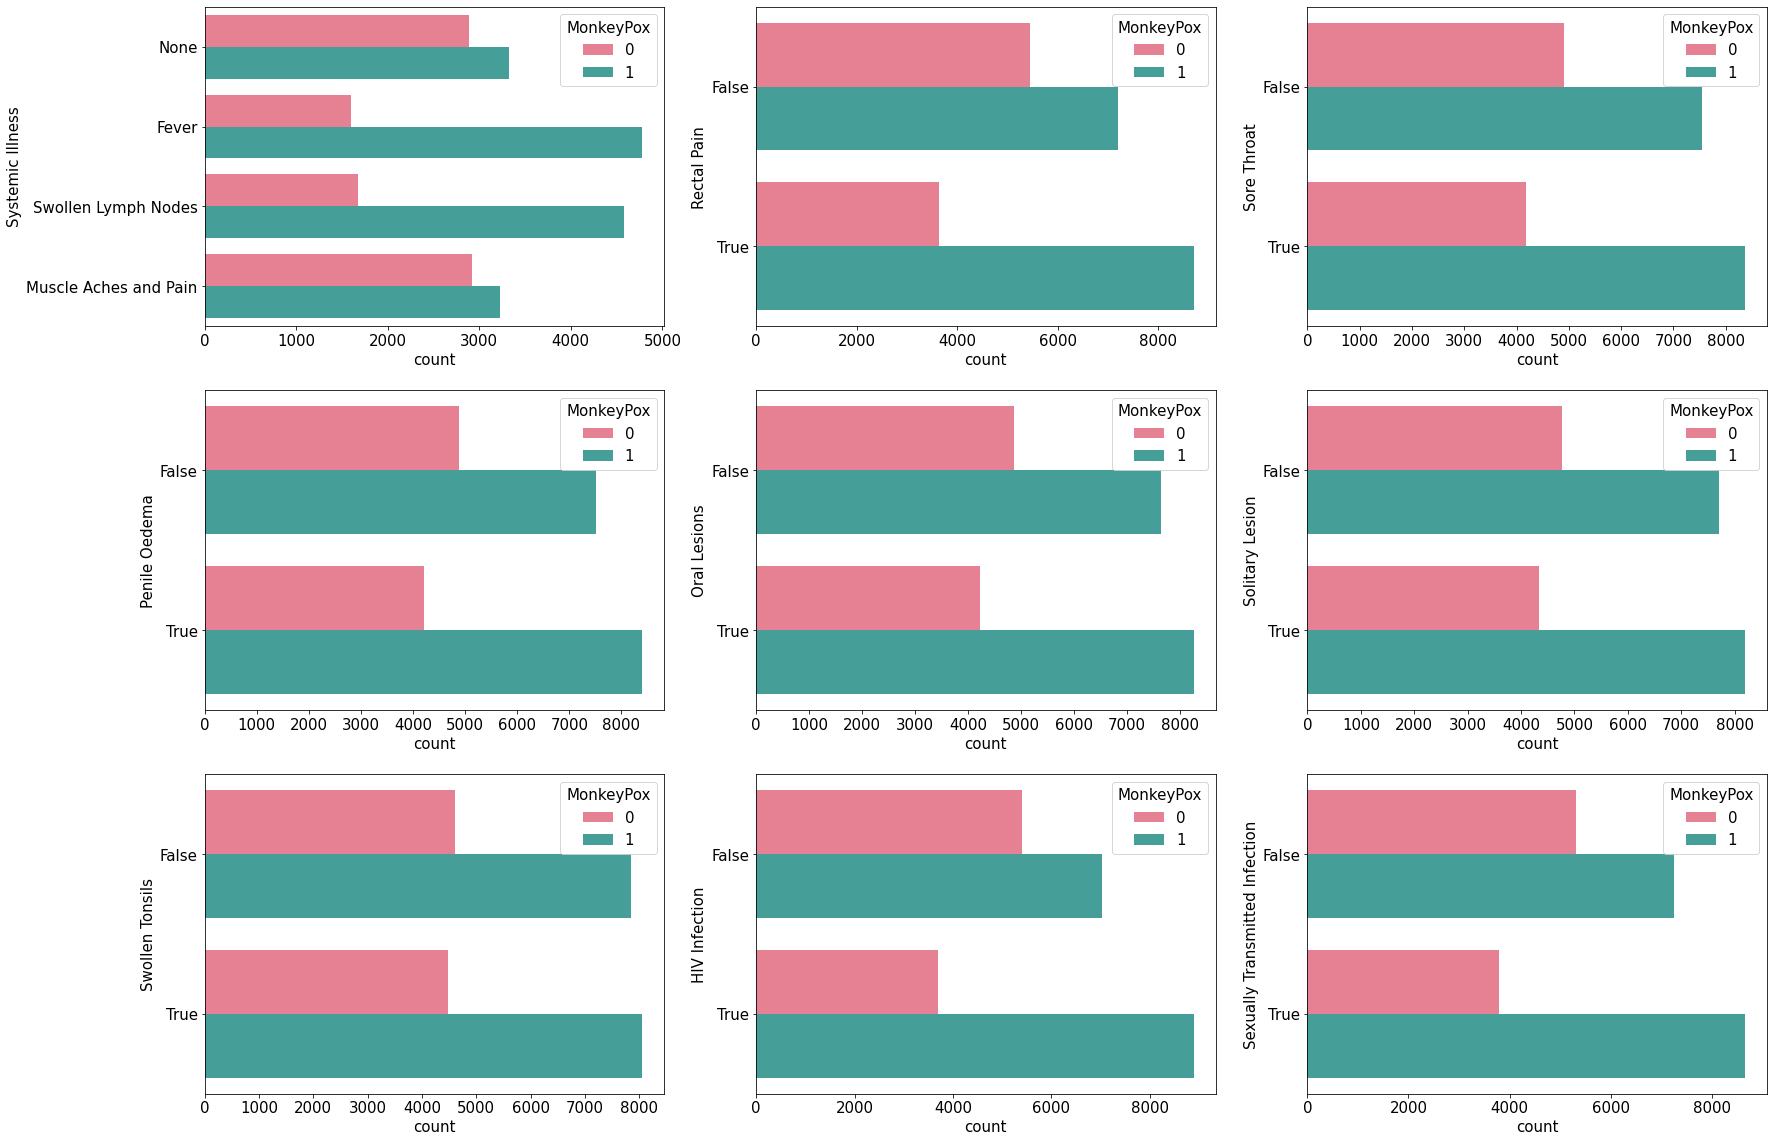

In [280]:
plt.figure(figsize=(28,20))
plt.rc('font', size=15)
for i in range(1,len(symptoms)+1):
    plt.subplot(3,3,i)
    sns.countplot(y=dataset[symptoms[i-1]],palette='husl',hue=dataset['MonkeyPox'])
plt.savefig('predictorVsResponse.png')

<h3><span style='color:green'>Nearly 50 percent of the patients have suffered Rectal Pain, sore throat, penile oedoma, oral lesions, solitary lesion, swollen tonsils, HIV infection, STD and 25 percent of patients had fever, muscle aches, swollen lymph nodes </span></h3>

<AxesSubplot:>

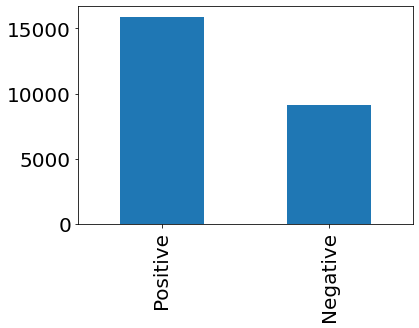

In [35]:
dataset['MonkeyPox'].value_counts().plot.bar()

<h3><span style='color:green'>The datatype of MonkeyPox column is boolean, we need to convert that to numeric for training into machine learning model. Mapping Positive to 1 and Negative to 0 </span></h3>

In [249]:
dataset['MonkeyPox']=dataset['MonkeyPox'].map({'Positive':1,'Negative':0})

In [250]:
dataset['MonkeyPox'].value_counts()

1    15909
0     9091
Name: MonkeyPox, dtype: int64

In [251]:
## independent variables and response variable

# storing MonkeyPox column in variable called y
y = dataset['MonkeyPox']

In [252]:
y.value_counts()

1    15909
0     9091
Name: MonkeyPox, dtype: int64

#### We don't need PatientId for training classifier therefore dropping patientid from the datset

In [253]:
# Storing all the columns otherthan MonkeyPox and PatientId columns in variable called X
x = dataset.drop(['MonkeyPox','Patient_ID'],axis=1)
x

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
0,None,False,True,True,True,False,True,False,False
1,Fever,True,False,True,True,False,False,True,False
2,Fever,False,True,True,False,False,False,True,False
3,None,True,False,False,False,True,True,True,False
4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...
24995,None,True,True,False,True,True,False,False,True
24996,Fever,False,True,True,False,True,True,True,True
24997,None,True,True,False,False,True,True,False,False
24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False


#### Mapping all the bool type column values; True as 1 and False as 0

In [254]:
for column in x.columns:
    if x[column].dtype == 'bool':
        x[column] = x[column].map({True:1,False:0})

In [255]:
x.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
0,None,0,1,1,1,0,1,0,0
1,Fever,1,0,1,1,0,0,1,0
2,Fever,0,1,1,0,0,0,1,0
3,None,1,0,0,0,1,1,1,0
4,Swollen Lymph Nodes,1,1,1,0,0,1,1,0


#### Systemic illness is of object type and has 4 values; therefore one-hot encoding this column

In [256]:
x = pd.get_dummies(x,drop_first=True)
x.head()

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Systemic Illness_Muscle Aches and Pain,Systemic Illness_None,Systemic Illness_Swollen Lymph Nodes
0,0,1,1,1,0,1,0,0,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,0
3,1,0,0,0,1,1,1,0,0,1,0
4,1,1,1,0,0,1,1,0,0,0,1


In [257]:
## Splitting data : 80% for training and 20% for validation 
## random_state is set to 45 to get reproducible output across multiple function calls

x_train, x_validation, y_train, y_validation = train_test_split(x,y,
                                                                test_size=0.15,
                                                                random_state=45,
                                                               stratify=y)
print("length of X_train :      ",len(x_train))
print("length of X_validation : ",len(x_validation))
print("length of y_train :      ",len(y_train))
print("length of y_validation:  ",len(y_validation))

length of X_train :       21250
length of X_validation :  3750
length of y_train :       21250
length of y_validation:   3750


In [258]:
y_validation.value_counts(normalize=True)

1    0.636267
0    0.363733
Name: MonkeyPox, dtype: float64

In [259]:
y_train.value_counts(normalize=True)

1    0.636376
0    0.363624
Name: MonkeyPox, dtype: float64

In [163]:
classifiers = {'KNN':KNeighborsClassifier(),
               'LogisticRegression':LogisticRegression(),
               'DecisionTree':DecisionTreeClassifier(),
               'RandomForest':RandomForestClassifier(),
               'SVC':SVC()}
classifiers


{'KNN': KNeighborsClassifier(),
 'LogisticRegression': LogisticRegression(),
 'DecisionTree': DecisionTreeClassifier(),
 'RandomForest': RandomForestClassifier(),
 'SVC': SVC()}

In [164]:
accuracy_clfs = {}
for name,clf in classifiers.items():
    print(clf.fit(x_train,y_train))
    ## Using the fitted model making predictions on validation data and stroring them in a variable called y_predicted.
    accuracy_clfs[name] = clf.score(x_validation,y_validation)
    print(f"Validation Accuracy : {clf.score(x_validation,y_validation)}")
    
    y_predicted = clf.predict(x_validation)
    # Confusion matrix 
    cm_matrix = confusion_matrix(y_validation, y_predicted)
    print("Confusion Matrix: \n",cm_matrix)

    # Classification Report
    print(" ")
    print("Classification Report : \n", classification_report(y_validation, y_predicted)) 
    print("---------------------------------------------------------------------------------")

KNeighborsClassifier()
Validation Accuracy : 0.652
Confusion Matrix: 
 [[ 577  787]
 [ 518 1868]]
 
Classification Report : 
               precision    recall  f1-score   support

           0       0.53      0.42      0.47      1364
           1       0.70      0.78      0.74      2386

    accuracy                           0.65      3750
   macro avg       0.62      0.60      0.61      3750
weighted avg       0.64      0.65      0.64      3750

---------------------------------------------------------------------------------
LogisticRegression()
Validation Accuracy : 0.696
Confusion Matrix: 
 [[ 546  818]
 [ 322 2064]]
 
Classification Report : 
               precision    recall  f1-score   support

           0       0.63      0.40      0.49      1364
           1       0.72      0.87      0.78      2386

    accuracy                           0.70      3750
   macro avg       0.67      0.63      0.64      3750
weighted avg       0.68      0.70      0.68      3750

--------------

In [165]:
res = pd.DataFrame(accuracy_clfs,index=['Accuracy']).transpose()
res

,Accuracy
KNN,0.652000
LogisticRegression,0.696000
DecisionTree,0.679733
RandomForest,0.681600
SVC,0.693867


In [166]:
res.Accuracy.tolist()

[0.652, 0.696, 0.6797333333333333, 0.6816, 0.6938666666666666]

<AxesSubplot:ylabel='Accuracy'>

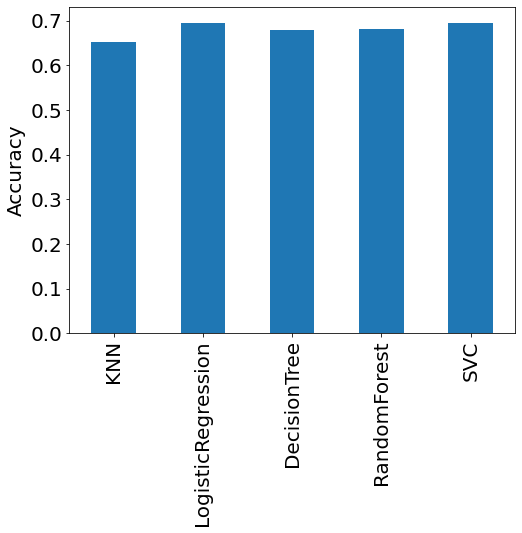

In [167]:
# Bar graph showing accuracy of eacg classifier
res.plot(figsize=(8,6),kind='bar',legend='',ylabel='Accuracy')

## Oversampling

In [193]:
dataset['MonkeyPox'].value_counts()

1    15909
0     9091
Name: MonkeyPox, dtype: int64

In [194]:
class_0 = dataset[dataset['MonkeyPox']==0]
class_1 = dataset[dataset['MonkeyPox']==1]
class_1_count,class_0_count = dataset['MonkeyPox'].value_counts()

In [195]:
class_0.shape

(9091, 11)

In [196]:
class_1.shape

(15909, 11)

In [197]:
class_0_over = class_0.sample(class_1_count,replace=True)
class_0_over.shape

(15909, 11)

In [198]:
class_0_over

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
17123,P17123,Fever,True,False,False,True,True,True,False,False,0
17147,P17147,Fever,True,True,True,False,True,False,True,False,0
21305,P21305,None,False,False,True,True,True,True,False,False,0
22858,P22858,Fever,True,True,True,False,True,False,False,False,0
10254,P10254,None,True,False,False,True,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
8127,P8127,None,True,False,False,False,False,False,True,False,0
8849,P8849,Muscle Aches and Pain,False,True,True,True,True,False,False,True,0
24852,P24852,None,True,False,True,False,True,True,False,True,0
15784,P15784,Swollen Lymph Nodes,True,True,True,False,True,True,False,False,0


In [183]:
class_1

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
1,P1,Fever,True,False,True,True,False,False,True,False,1
2,P2,Fever,False,True,True,False,False,False,True,False,1
3,P3,None,True,False,False,False,True,True,True,False,1
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,1
6,P6,Fever,False,True,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...
24994,P24994,Fever,False,True,True,False,False,False,True,True,1
24995,P24995,None,True,True,False,True,True,False,False,True,1
24996,P24996,Fever,False,True,True,False,True,True,True,True,1
24997,P24997,None,True,True,False,False,True,True,False,False,1


In [199]:
data_oversampled=pd.concat([class_1,class_0_over],axis=0)
data_oversampled

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
1,P1,Fever,True,False,True,True,False,False,True,False,1
2,P2,Fever,False,True,True,False,False,False,True,False,1
3,P3,None,True,False,False,False,True,True,True,False,1
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,1
6,P6,Fever,False,True,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...
8127,P8127,None,True,False,False,False,False,False,True,False,0
8849,P8849,Muscle Aches and Pain,False,True,True,True,True,False,False,True,0
24852,P24852,None,True,False,True,False,True,True,False,True,0
15784,P15784,Swollen Lymph Nodes,True,True,True,False,True,True,False,False,0


In [200]:
y = data_oversampled['MonkeyPox']
y.shape

(31818,)

In [201]:
x = data_oversampled.drop(['MonkeyPox','Patient_ID'],axis=1)
x

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
1,Fever,True,False,True,True,False,False,True,False
2,Fever,False,True,True,False,False,False,True,False
3,None,True,False,False,False,True,True,True,False
4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False
6,Fever,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
8127,None,True,False,False,False,False,False,True,False
8849,Muscle Aches and Pain,False,True,True,True,True,False,False,True
24852,None,True,False,True,False,True,True,False,True
15784,Swollen Lymph Nodes,True,True,True,False,True,True,False,False


In [202]:
for column in x.columns:
    if x[column].dtype == 'bool':
        x[column] = x[column].map({True:1,False:0})
    

In [203]:
x = pd.get_dummies(x,drop_first=True)
x.head()

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Systemic Illness_Muscle Aches and Pain,Systemic Illness_None,Systemic Illness_Swollen Lymph Nodes
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,0
3,1,0,0,0,1,1,1,0,0,1,0
4,1,1,1,0,0,1,1,0,0,0,1
6,0,1,0,0,0,0,1,0,0,0,0


In [204]:
x_train, x_validation, y_train, y_validation = train_test_split(x,y,
                                                                test_size=0.15,
                                                                random_state=45,
                                                               stratify=y)
print("length of X_train :      ",len(x_train))
print("length of X_validation : ",len(x_validation))
print("length of y_train :      ",len(y_train))
print("length of y_validation:  ",len(y_validation))

length of X_train :       27045
length of X_validation :  4773
length of y_train :       27045
length of y_validation:   4773


In [205]:
classifiers = {'KNN':KNeighborsClassifier(),
               'LogisticRegression':LogisticRegression(),
               'DecisionTree':DecisionTreeClassifier(),
               'RandomForest':RandomForestClassifier(),
               'SVC':SVC()}

In [206]:
accuracy_clfs = {}
for name,clf in classifiers.items():
    print(clf.fit(x_train,y_train))
    ## Using the fitted model making predictions on validation data and stroring them in a variable called y_predicted.
    accuracy_clfs[name] = clf.score(x_validation,y_validation)
    print(f"Validation Accuracy : {clf.score(x_validation,y_validation)}")
    
    y_predicted = clf.predict(x_validation)
    # Confusion matrix 
    cm_matrix = confusion_matrix(y_validation, y_predicted)
    print("Confusion Matrix: \n",cm_matrix)

    # Classification Report
    print(" ")
    print("Classification Report : \n", classification_report(y_validation, y_predicted)) 
    print("---------------------------------------------------------------------------------")

KNeighborsClassifier()
Validation Accuracy : 0.6186884558977582
Confusion Matrix: 
 [[1455  931]
 [ 889 1498]]
 
Classification Report : 
               precision    recall  f1-score   support

           0       0.62      0.61      0.62      2386
           1       0.62      0.63      0.62      2387

    accuracy                           0.62      4773
   macro avg       0.62      0.62      0.62      4773
weighted avg       0.62      0.62      0.62      4773

---------------------------------------------------------------------------------
LogisticRegression()
Validation Accuracy : 0.6503247433479992
Confusion Matrix: 
 [[1562  824]
 [ 845 1542]]
 
Classification Report : 
               precision    recall  f1-score   support

           0       0.65      0.65      0.65      2386
           1       0.65      0.65      0.65      2387

    accuracy                           0.65      4773
   macro avg       0.65      0.65      0.65      4773
weighted avg       0.65      0.65      0.65

In [207]:
res = pd.DataFrame(accuracy_clfs,index=['Accuracy']).transpose()
res

,Accuracy
KNN,0.618688
LogisticRegression,0.650325
DecisionTree,0.653467
RandomForest,0.655563
SVC,0.660381


<AxesSubplot:ylabel='Accuracy'>

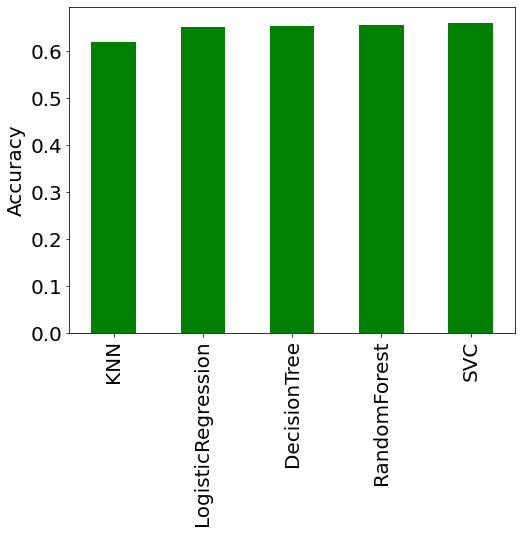

In [209]:
# Bar graph showing accuracy of eacg classifier
res.plot(figsize=(8,6),kind='bar',legend='',ylabel='Accuracy',color='green')

## SMOTE

In [231]:
Y = dataset['MonkeyPox']
X = dataset.iloc[:,1:10]

In [232]:
Y

0        0
1        1
2        1
3        1
4        1
        ..
24995    1
24996    1
24997    1
24998    0
24999    1
Name: MonkeyPox, Length: 25000, dtype: int64

In [233]:
X

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
0,None,False,True,True,True,False,True,False,False
1,Fever,True,False,True,True,False,False,True,False
2,Fever,False,True,True,False,False,False,True,False
3,None,True,False,False,False,True,True,True,False
4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...
24995,None,True,True,False,True,True,False,False,True
24996,Fever,False,True,True,False,True,True,True,True
24997,None,True,True,False,False,True,True,False,False
24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False


In [234]:
for column in X.columns:
    if X[column].dtype == 'bool':
        X[column] = X[column].map({True:1,False:0})

In [235]:
X = pd.get_dummies(X,drop_first=True)
X.head()

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,Systemic Illness_Muscle Aches and Pain,Systemic Illness_None,Systemic Illness_Swollen Lymph Nodes
0,0,1,1,1,0,1,0,0,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,0
3,1,0,0,0,1,1,1,0,0,1,0
4,1,1,1,0,0,1,1,0,0,0,1


In [237]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_sm,Y_sm=sm.fit_resample(X,Y)

In [239]:
Y_sm.value_counts()

1    15909
0    15909
Name: MonkeyPox, dtype: int64

In [244]:
x_train, x_validation, y_train, y_validation = train_test_split(X_sm,Y_sm,
                                                                test_size=0.15,
                                                                random_state=45,
                                                               stratify=Y_sm)
print("length of X_train :      ",len(x_train))
print("length of X_validation : ",len(x_validation))
print("length of y_train :      ",len(y_train))
print("length of y_validation:  ",len(y_validation))

length of X_train :       27045
length of X_validation :  4773
length of y_train :       27045
length of y_validation:   4773


In [245]:
classifiers = {'KNN':KNeighborsClassifier(),
               'LogisticRegression':LogisticRegression(),
               'DecisionTree':DecisionTreeClassifier(),
               'RandomForest':RandomForestClassifier(),
               'SVC':SVC()}

accuracy_clfs = {}
for name,clf in classifiers.items():
    print(clf.fit(x_train,y_train))
    ## Using the fitted model making predictions on validation data and stroring them in a variable called y_predicted.
    accuracy_clfs[name] = clf.score(x_validation,y_validation)
    print(f"Validation Accuracy : {clf.score(x_validation,y_validation)}")
    
    y_predicted = clf.predict(x_validation)
    # Confusion matrix 
    cm_matrix = confusion_matrix(y_validation, y_predicted)
    print("Confusion Matrix: \n",cm_matrix)

    # Classification Report
    print(" ")
    print("Classification Report : \n", classification_report(y_validation, y_predicted)) 
    print("---------------------------------------------------------------------------------")

KNeighborsClassifier()
Validation Accuracy : 0.6153362664990571
Confusion Matrix: 
 [[1428  958]
 [ 878 1509]]
 
Classification Report : 
               precision    recall  f1-score   support

           0       0.62      0.60      0.61      2386
           1       0.61      0.63      0.62      2387

    accuracy                           0.62      4773
   macro avg       0.62      0.62      0.62      4773
weighted avg       0.62      0.62      0.62      4773

---------------------------------------------------------------------------------
LogisticRegression()
Validation Accuracy : 0.6499057196731616
Confusion Matrix: 
 [[1556  830]
 [ 841 1546]]
 
Classification Report : 
               precision    recall  f1-score   support

           0       0.65      0.65      0.65      2386
           1       0.65      0.65      0.65      2387

    accuracy                           0.65      4773
   macro avg       0.65      0.65      0.65      4773
weighted avg       0.65      0.65      0.65

<AxesSubplot:ylabel='Accuracy'>

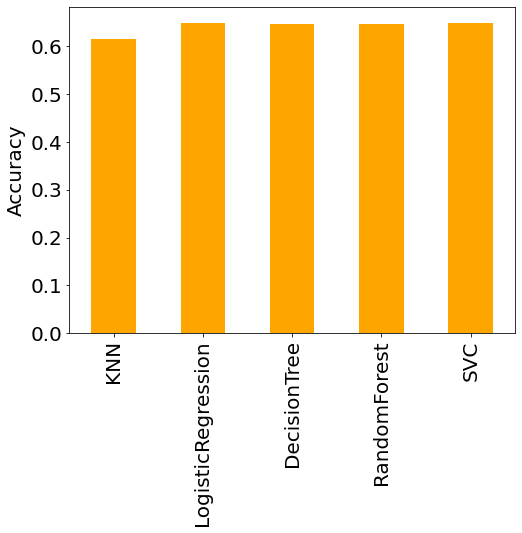

In [247]:
res = pd.DataFrame(accuracy_clfs,index=['Accuracy']).transpose()
# Bar graph showing accuracy of eacg classifier
res.plot(figsize=(8,6),kind='bar',legend='',ylabel='Accuracy',color='orange')

## GridSearch

In [260]:
from sklearn.model_selection import GridSearchCV

In [265]:
grid_params = { 
                    'penalty' :   ['l1', 'l2'],
                    'C'       :   np.logspace(-1, 2, 20)
                  }


In [270]:
model = GridSearchCV(
                            estimator= LogisticRegression(random_state = 1),
                            param_grid = grid_params, 
                            scoring    = 'accuracy',  
                            n_jobs     = -1
                       )
model.fit(x_train,y_train)  
y_predicted = model.best_estimator_.predict(x_validation)
accuracy_logistic = accuracy_score(y_validation, y_predicted)
print("Validation Accuracy : ", (accuracy_logistic),  "\n ")

Validation Accuracy :  0.696 
 


In [274]:
grid_params_svc= {  
                   'C'     :        [0.1,1,10,100], 
                   'gamma' :        [1,0.1,0.01,0.001],
                   'kernel':        ['rbf','linear']
                  } 

In [275]:
model = GridSearchCV(
                            estimator= SVC(random_state = 1),
                            param_grid = grid_params_svc, 
                            scoring    = 'accuracy',  
                            n_jobs     = -1,
                            verbose = 2
                       )
model.fit(x_train,y_train)  
y_predicted = model.best_estimator_.predict(x_validation)
accuracy_svc = accuracy_score(y_validation, y_predicted)
print("Validation Accuracy : ", (accuracy_svc),  "\n ")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Validation Accuracy :  0.6962666666666667 
 


- I have tried 2 types of over sampling techniques to balance the dataset in order to improve the accuracy of the classifiers but the classifiers performance didnot improve
- I then tried Gridsearch to see if my two best performing classifiers(LogisticRegression & SVC) to see if the Gridserach improves classifier performance however the performnace didn't improve

## Comments
- There are many other important factors that needs to be considered when predicting a disease
- These include patients contact with an infected person(YES/NO),How long the patient has been suffering the main symptoms of MonkeyPox, any skin eruption, the site of blister development(face,back,palms,soles), whether blisters are itchy or not, whether blisters are filled with pus or not
### These factors play  crucial role in diagnosing a pateint for monkeypox and it's ideal to have a balance and more data inorder to build an effiecient classifier 